In [42]:
import os
import random
import cv2
import matplotlib.pyplot as plt

##  Stage one

In [3]:
pics_folder = 'NumBase'
all_pics = os.listdir(pics_folder) # file names WITH ".bmp" and WITH space
alphabet = "ABEKMHOPCTYX" + "".join([str(i) for i in range(10)])

In [3]:
# First clean: delete files with small name and with non-alphabet symbols

def num_check(car_number):
    car_number = car_number[:-4].replace(" ", "")
    flag = True
    if len(car_number) < 6:
        flag = False
    for char in car_number:
        if char not in alphabet:
            flag = False
            break
    return flag

In [4]:
# 950 pics deleted, 4120 left

for car_number in all_pics:
    if not num_check(car_number):
        os.remove(pics_folder + '/' + car_number)

## Stage two

In [5]:
all_pics = os.listdir(pics_folder)

In [6]:
# renaming: X328MT 197.bmp ----> X328MT197.bmp (no spaces)

for car_number in all_pics:
    new_name = car_number.replace(" ", "")
    os.rename(pics_folder + '/' + car_number, pics_folder + '/' + new_name)

In [7]:
all_pics = os.listdir(pics_folder)

In [8]:
similar_names = dict()
used = set()

for i in range(len(all_pics)):
    
    if i in used:
        continue
    used.add(i)
    similar_names[all_pics[i]] = []
    
    for j in range(len(all_pics)):
        
        if all_pics[i][0:6] == all_pics[j][0:6]:
            similar_names[all_pics[i]].append(all_pics[j])
            used.add(j)

In [9]:
for key in similar_names:
    if len(similar_names[key]) == 1:
        real_number = similar_names[key][0][:-4]
    else:
        real_number = os.path.commonprefix(similar_names[key])
    for i, car_number in enumerate(similar_names[key]):
        if os.path.exists(pics_folder + '/' + car_number):
            os.rename(pics_folder + '/' + car_number, pics_folder + '/' + real_number + '_' + str(i) + '.bmp')
        else:
            print('wtf')

In [10]:
all_pics = os.listdir(pics_folder)

## Stage three

In [28]:
# manually selected bad numbers, i.e. ТАНКИСТ and etc.

bad_nums = []
with open('/home/stefan/numbers_bad', 'r') as f:
    for line in f:
        bad_nums.append(line.rstrip())
bad_nums = bad_nums[:-2]

In [33]:
for num in bad_nums:
    try:
        os.remove(pics_folder + '/' + num + '.bmp')
    except Exception:
        continue

## Stage four

In [156]:
all_pics = os.listdir(pics_folder)

In [297]:
used = set()
def rename_label():
    car_number = random.choice(all_pics)
    if car_number in used:
        rename_label()
    used.add(car_number)
    print(car_number)
    x = cv2.imread('NumBase' + '/' + car_number)
    plt.imshow(x)
    plt.show()
    first = input()
    if first in ['y', 'YES', 'yes', 'Y']:
        print('enter real car name WITHOUT .BMP but WITH "_i"')
        second = input()
        os.rename(pics_folder + '/' + car_number, pics_folder + '/' + second + '.bmp')
        print(car_number + ' ------> ' + second + '.bmp')
    else:
        return 0

O919HY76_0.bmp


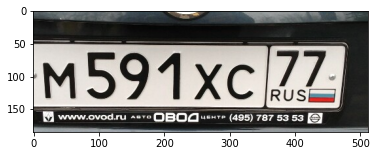

YES
enter real car name WITHOUT .BMP but WITH "_i"
M591XC77_0
O919HY76_0.bmp ------> M591XC77_0.bmp


In [304]:
rename_label()

In [148]:
for pic in all_pics:
    if ('A000AA_' in pic):
        idx = pic.split('_')[1][:-4]
        os.rename(pics_folder + '/' + pic, pics_folder + '/' + 'A000AA77_' + idx + '.bmp')